# Problem statement :
Use classification technique for
prediction of Graduate Admissions
from an Indian perspective

# Introduction
The data used in this notebook is from the Kaggle dataset "Graduate Admission Prediction". This data is us3d to predict the students graduate admissions based on their performance.The dataset contains several features such as student's GRE score, TOEFL score, CGPA,and some other information like University Rating ,SOP,LOR ,Research ,Chance of admit. Using these features we are going to predict whether the students gets Graduate Admission or not by using classifacation techniques..

# Importing required libraries

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
data= pd.read_csv(r"C:\Users\DELL\Desktop\Internsavy\task_1\Admission_Predict.csv")

In [187]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


data consists of 400 datapoints with 8 featues the first column serial number is not required so it has to be droppeed in for further analysis

In [188]:
data = data.copy()
data.drop(['Serial No.'], axis=1, inplace=True)

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [282]:
data["GRE Score"].max()

340

In [283]:
data["TOEFL Score"].max()

120

In [284]:
data["University Rating"].max()

5

In [285]:
data["CGPA"].max()

9.92

In [286]:
data["SOP"].max()

5.0

In [287]:
data["LOR"].max()

5.0

Now there are 8 feature variables or columns with 

no i.e., 0 null values

data type float64 are SOP,LOR,CGPA,Chance Of Admit

data type int64 are GRE Score,TOFEL Score,University Rating,Research

In this  dataset (observations):

The GRE score ( out of 340 )

TOEFL Scores ( out of 120 )

University Rating ( out of 5 )

Statement of Purpose and Letter of Recommendation Strength ( out of 5 )

Undergraduate CGPA ( out of 10 )

Research ( either 0 or 1 )

Chance of Admit ( ranging from 0 to 1 )


In [205]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [206]:
data.duplicated().sum()

0

In [207]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [191]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [192]:
column=data.columns
column

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [200]:
data=data.rename(columns = {"Chance of Admit ":"Chance of Admit"})
data=data.rename(columns = {"LOR ":"LOR"})

In [201]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

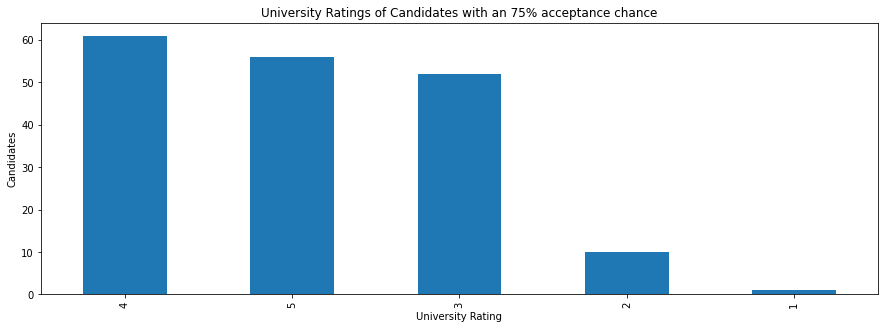

In [224]:
d = data[data["Chance of Admit"] >= 0.75]["University Rating"].value_counts().head(5)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
d.plot(kind='bar',figsize=(15, 5),linestyle='dashed',linewidth=5)
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.show()

In [219]:
print("Average  Score \n",np.mean(data))
print("\n")
print("Average GRE Score :{0:.2f} out of 340".format(data['GRE Score'].mean()))
print('Average TOEFL Score:{0:.2f} out of 120'.format(data['TOEFL Score'].mean()))
print('Average CGPA:{0:.2f} out of 10'.format(data['CGPA'].mean()))
print('Average Chance of getting admitted:{0:.2f}%'.format(data['Chance of Admit'].mean()*100))

Average  Score 
 GRE Score            316.807500
TOEFL Score          107.410000
University Rating      3.087500
SOP                    3.400000
LOR                    3.452500
CGPA                   8.598925
Research               0.547500
Chance of Admit        0.724350
dtype: float64


Average GRE Score :316.81 out of 340
Average TOEFL Score:107.41 out of 120
Average CGPA:8.60 out of 10
Average Chance of getting admitted:72.43%


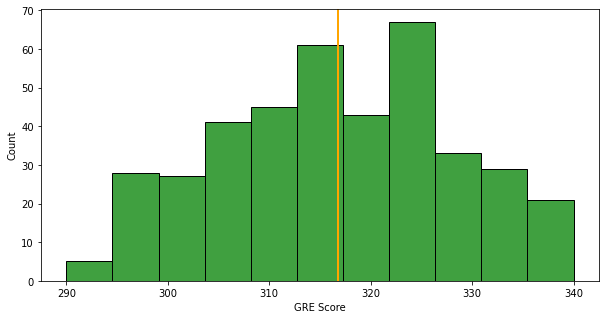

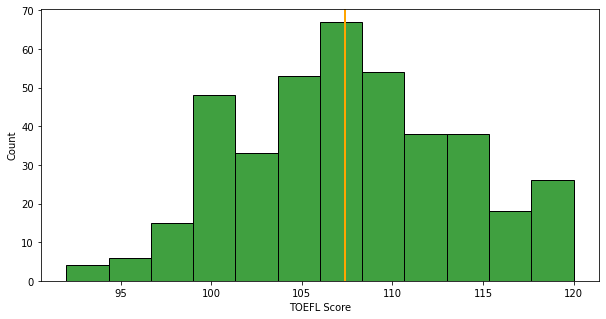

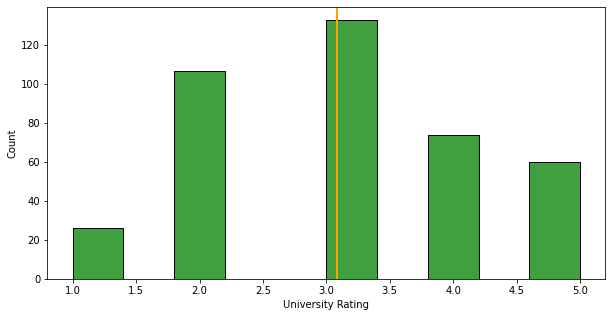

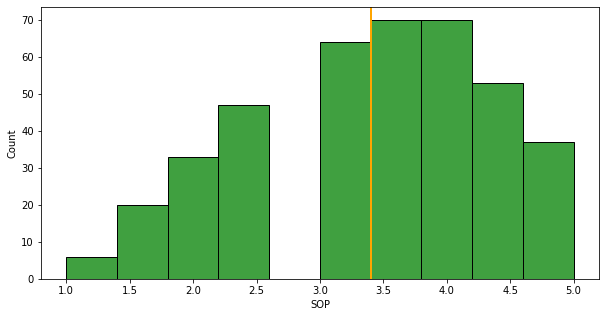

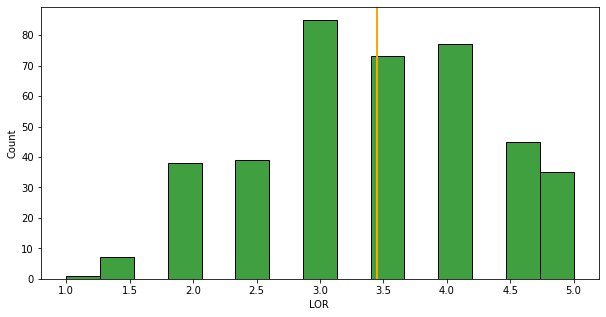

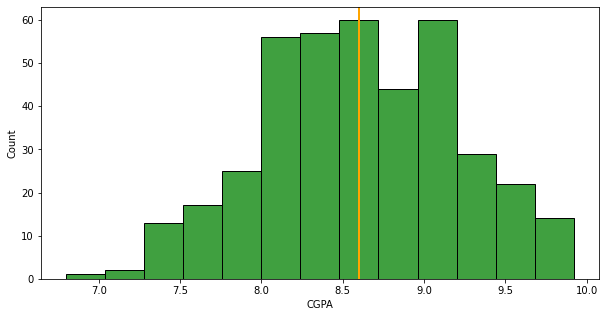

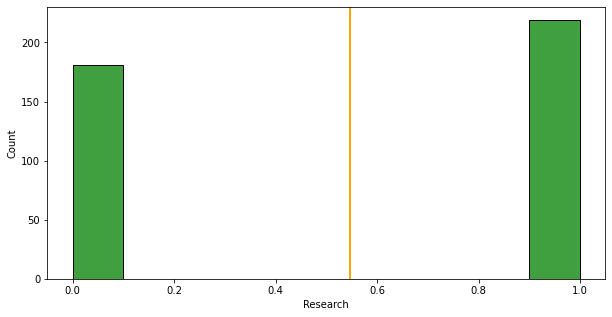

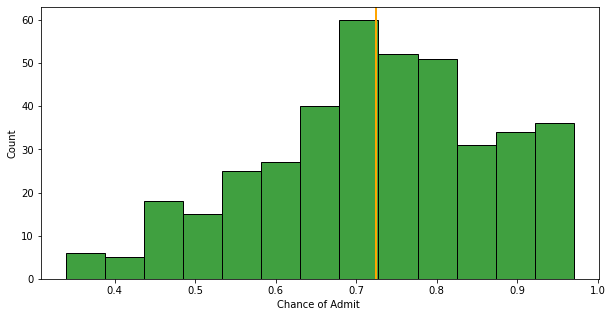

In [167]:
for n in column :
  fig, ax = plt.subplots(1, 1, figsize=(10, 5))
  sns.histplot(data[n], color="green", ax=ax, fill = True)
  ax.axvline(data[n].mean(), color="orange", linewidth=2)

  plt.show()

The mean of GRE Score is around 316 , TOEFL SCore is 107 , University Rating is 3, SOP is 3.4, LOR is also around 3.4, 

CGPA is 8.6,Chance of Admit is 0.7


In [289]:
data["University Rating"].mean()

3.0875

In [303]:
data["CGPA"].mean()

8.598924999999998

In [296]:
data[["LOR","SOP"]].mean()

LOR    3.4525
SOP    3.4000
dtype: float64

In [297]:
data[["GRE Score","TOEFL Score"]].mean()

GRE Score      316.8075
TOEFL Score    107.4100
dtype: float64

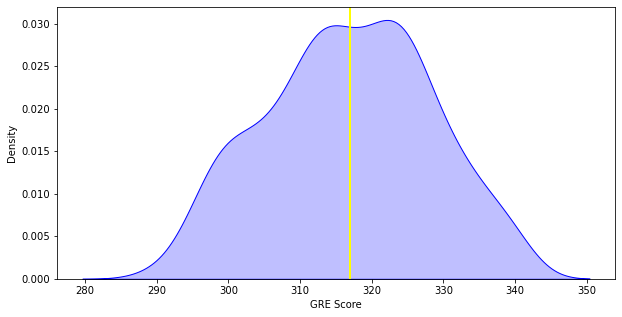

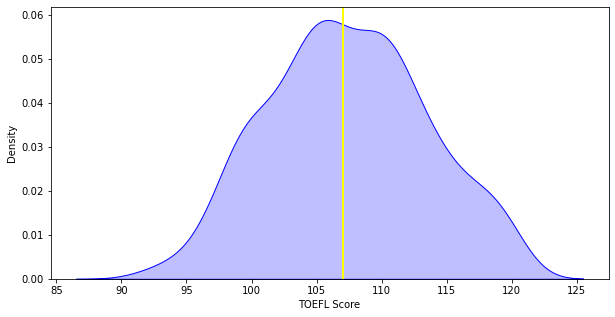

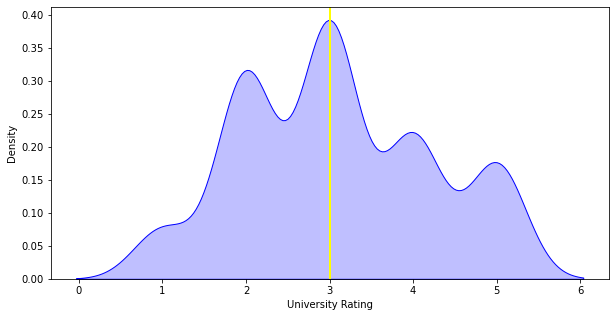

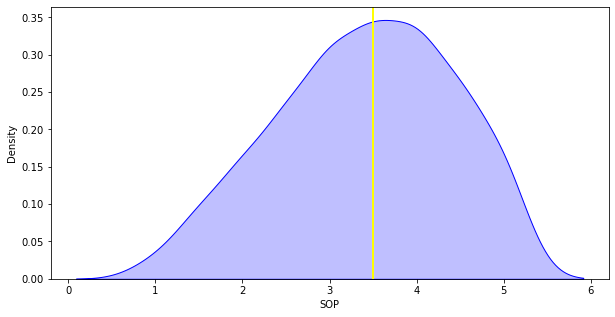

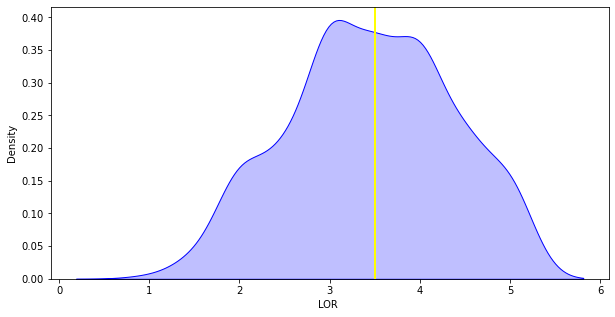

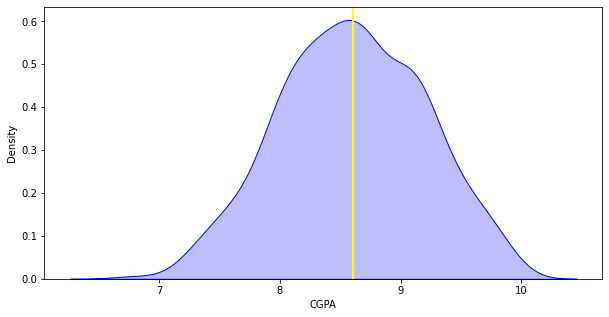

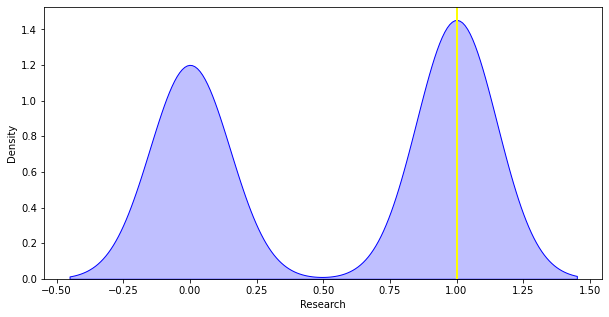

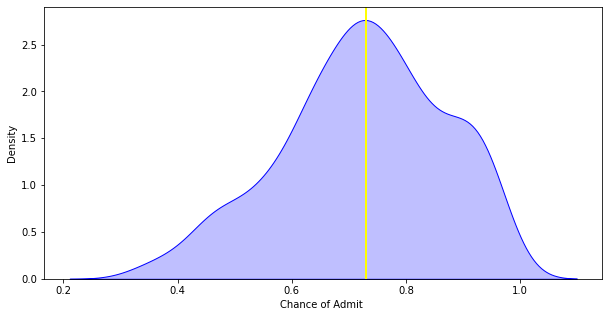

In [168]:
for i in column:
    fig1,ax = plt.subplots(1,1,figsize=(10,5))
    sns.kdeplot(data[i], color = "blue" ,ax=ax,fill=True)
    ax.axvline(data[i].median(), color="yellow", linewidth=2)
    plt.show()

In [298]:
data[["GRE Score","TOEFL Score"]].median()

GRE Score      317.0
TOEFL Score    107.0
dtype: float64

In [299]:
data[["LOR","SOP"]].median()

LOR    3.5
SOP    3.5
dtype: float64

In [300]:
data["University Rating"].median()

3.0

In [304]:
data["CGPA"].median()

8.61

The mean and median are almost on the same line this indicates that the distribution is normal .

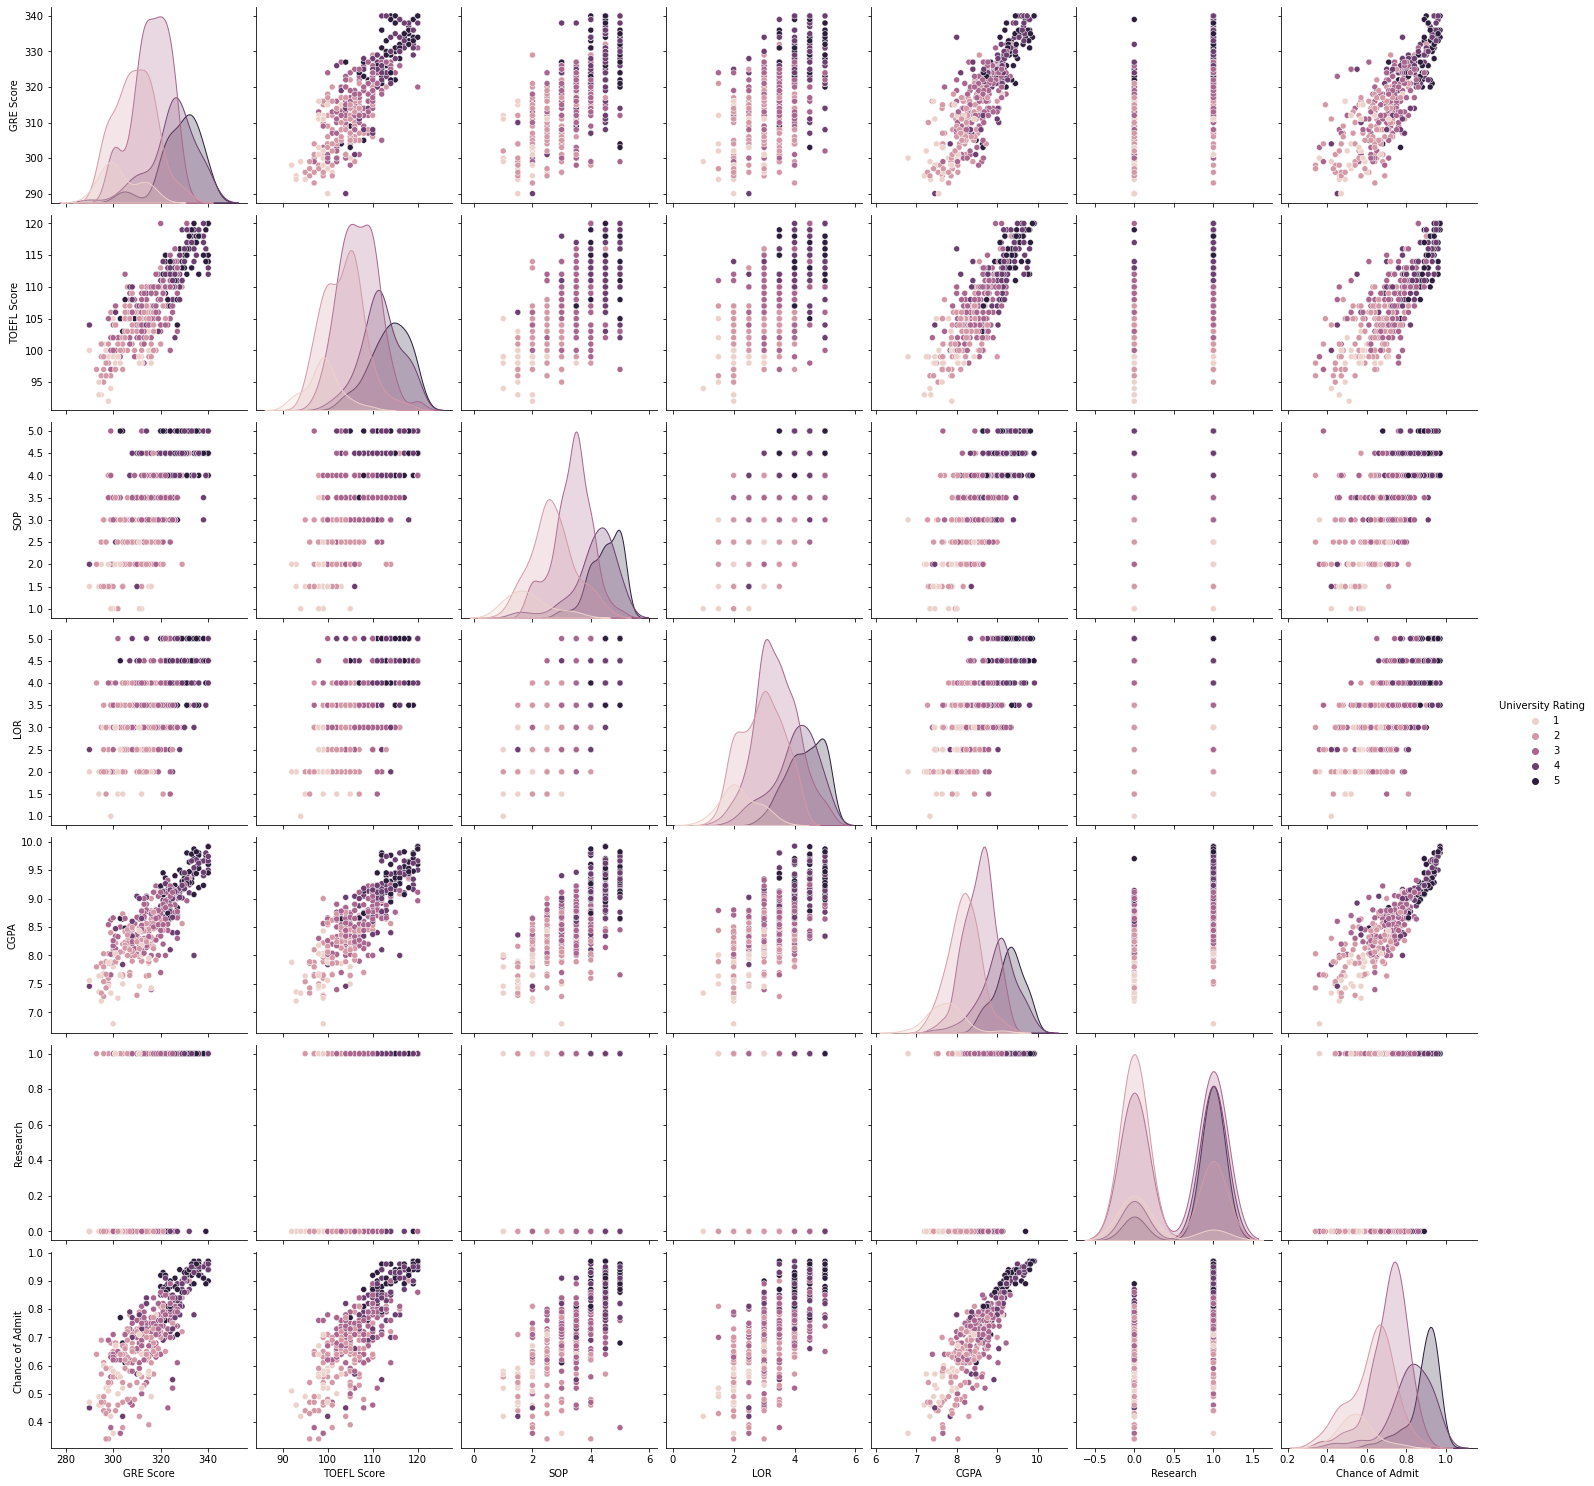

In [169]:
sns.pairplot(data,hue="University Rating",height=3)

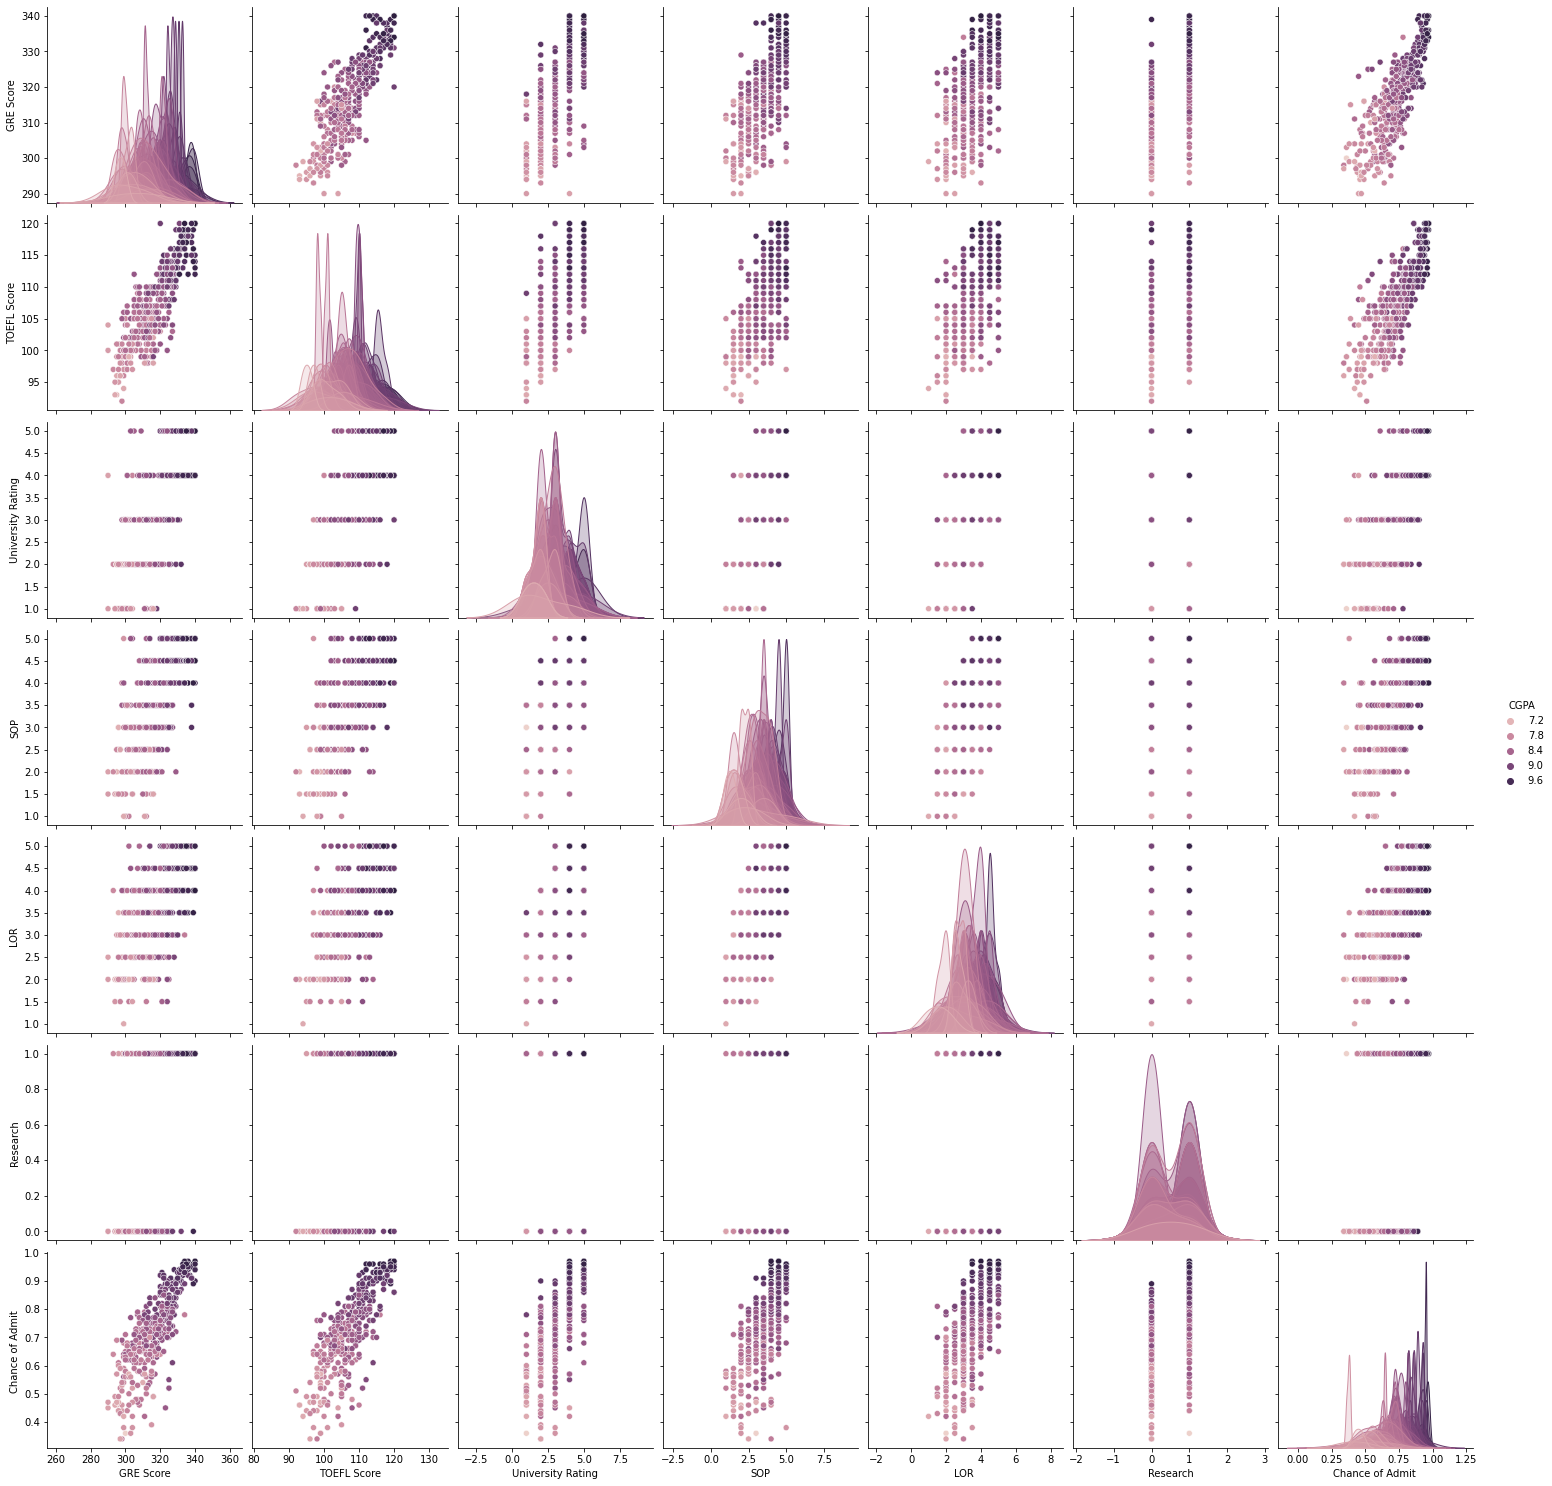

In [170]:
sns.pairplot(data,hue="CGPA",height=3)

In [171]:
corr = data.corr()

In [172]:
corr

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


correlation of 1 indicates there is perfect positive correlation

correlation of 0.5 indicates moderate correlation between coefficients

correlation less than 0.5 indicates there is negative correlation

therefore in the above it says that there is good to moderate correlation between GRE Score and corresponding features

between LOR and Research there is low relation


In [173]:
from scipy.stats import skew

skew_data = pd.DataFrame(data = column, columns=['Features'])
skewness = []
for i in column:
  skewness.append(skew(data[i]))

skew_data['Skewness'] = skewness
skew_data

,Features,Skewness
0,GRE Score,-0.062657
1,TOEFL Score,0.057001
2,University Rating,0.170617
3,SOP,-0.274726
4,LOR,-0.106590
5,CGPA,-0.065743
6,Research,-0.190863
7,Chance of Admit,-0.352121


The above clearly tells us the skewness of the data distribution in each feature. Skewness is a measure of the asymmetry of a distribution. The skewness of nomal distribution is approximately near to 0.  It is visible that the  features have skewness values close to 0, therefore it can be considered as normally distributed.

I will use value_counts() to return a count of unique values in that column, along with their respective frequencies. I'll use it for :

University Rating

Statement of Purpose(SOP)

Letter of Recommendation Strength(LOR)

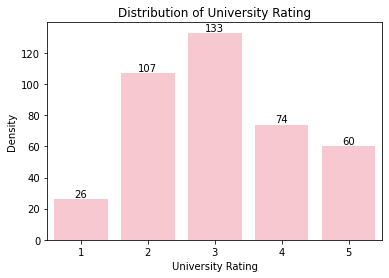

In [177]:
ax = sns.barplot(x= U_R.index , y= U_R.tolist(), data=data, color= 'pink')
ax.bar_label(ax.containers[0])

plt.xlabel("University Rating")
plt.ylabel("Density")
plt.title("Distribution of University Rating")

plt.show()

# Model 

In [243]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,mean_squared_error
from sklearn.ensemble import RandomForestClassifier ,RandomForestRegressor ,AdaBoostRegressor ,GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import  Lasso,Ridge,ElasticNet,LinearRegression,LogisticRegression,SGDRegressor
from sklearn import tree


In [307]:

X = data.drop(['Chance of Admit'], axis=1)
y = data['Chance of Admit']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=3)

# Classification

# Random Forest Classifier

In [308]:
y_train = [1 if each > 0.8 else 0 for each in y_train]

y_test = [1 if each > 0.8 else 0 for each in y_test]
rfc=RandomForestClassifier(n_estimators=100,random_state = 0)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)


print('Confusion Matrix - Train: \n', confusion_matrix(y_test, y_pred))
print('Overall Accuracy - Train: ', accuracy_score(y_test, y_pred))
print("MSE",np.sqrt(mean_squared_error(y_test,y_pred)))

Confusion Matrix - Train: 
 [[50  0]
 [ 5 25]]
Overall Accuracy - Train:  0.9375
MSE 0.25


 for y_train if the "chance of admit" is greater than "80" then the admission is confirmed means "1"
 
for y_test if the "chance of admit" is lower than "80" then the admission is not confirmed means "0"


# Decision Tree Classifier

In [260]:
X = data.loc[:,'GRE Score':'Research']
y = data['Chance of Admit'] >= .8
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2)
dtree = DecisionTreeClassifier(max_depth = 2, ccp_alpha = 0.01, criterion = 'gini')
dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=2)

In [273]:
X = data.loc[:,'CGPA':'Research']
y = data['Chance of Admit'] >= .8
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2)
dtree1 = DecisionTreeClassifier(max_depth = 2, ccp_alpha = 0.01, criterion = 'gini')
dtree1.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=2)

In [261]:
#predicting 
y_pred = dtree.predict(x_test)
print(dtree.score(x_test, y_test), 
      accuracy_score(y_test, y_pred))

0.925 0.925


# Graphical representation of tree

[Text(0.4, 0.8333333333333334, 'CGPA <= 8.845\ngini = 0.443\nsamples = 320\nvalue = [214, 106]\nclass = unlikely admit'),
 Text(0.2, 0.5, '0.099\n210\n[199, 11]\nunlikely admit'),
 Text(0.6, 0.5, 'GRE Score <= 313.5\n0.236\n110\n[15, 95]\nlikley admit'),
 Text(0.4, 0.16666666666666666, '0.0\n4\n[4, 0]\nunlikely admit'),
 Text(0.8, 0.16666666666666666, '0.186\n106\n[11, 95]\nlikley admit')]

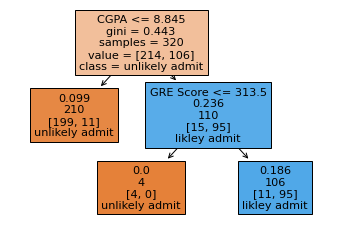

In [262]:
tree.plot_tree(dtree, 
               feature_names = x_train.columns,
               max_depth = 3,
               class_names = ['admission', 'no admission'],
               label = 'root',
               filled = True
              )

[Text(0.4, 0.8333333333333334, 'CGPA <= 8.845\ngini = 0.443\nsamples = 320\nvalue = [214, 106]\nclass = admission'),
 Text(0.2, 0.5, '0.099\n210\n[199, 11]\nadmission'),
 Text(0.6, 0.5, 'CGPA <= 9.07\n0.236\n110\n[15, 95]\nnoadmission'),
 Text(0.4, 0.16666666666666666, '0.485\n29\n[12, 17]\nnoadmission'),
 Text(0.8, 0.16666666666666666, '0.071\n81\n[3, 78]\nnoadmission')]

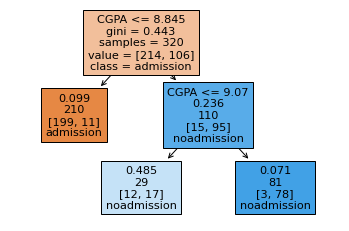

In [309]:
tree.plot_tree(dtree1, 
               feature_names = x_train.columns,
               max_depth = 3,
               class_names = ['admission', 'noadmission'],
               label = 'root',
               filled = True
              )

In [263]:
print(tree.export_text(dtree, feature_names = X.columns.tolist()))

|--- CGPA <= 8.85
|   |--- class: False
|--- CGPA >  8.85
|   |--- GRE Score <= 313.50
|   |   |--- class: False
|   |--- GRE Score >  313.50
|   |   |--- class: True



# Split criteria

For a classification task, the default split criteria is Gini impurity – this gives a measurement that is used to build Decision Trees to determine how the features of a dataset should split nodes to form the tree.


In [264]:
# Calculate the Gini Impurity Score
def gini(data):
    data = pd.Series(data)
    return 1 - sum(data.value_counts(normalize=True)**2)

gi = gini(y_train)
print(f'Gini impurity at root: {round(gi,3)}')

Gini impurity at root: 0.443


In [265]:
# Information Gain associated with creating a node/split data

"""Input: left, right are data in left branch, right banch, respectively
    current_impurity is the data impurity before splitting into left, right branches"""
def info_gain(left, right, current_impurity):
    # weight for gini score of the left branch
    w = float(len(left)) / (len(left) + len(right))
    return current_impurity - w * gini(left) - (1 - w) * gini(right)

In [267]:
# We are going to verify how the split on cgpa was determined
"""We will use info_gain over ALL values of cgpa to determine the information gain 
when split on each value. This is stored in a table and sorted"""

info_gain_list = []
for i in x_train.CGPA.unique():
    left = y_train[x_train.CGPA <= i]
    right = y_train[x_train.CGPA > i]
    info_gain_list.append([i, info_gain(left, right, gi)])
                           
ig_table = pd.DataFrame(info_gain_list, columns=['split_value',
                                                'info_gain']).sort_values('info_gain', ascending=False)
ig_table.head(10)

,split_value,info_gain
10,8.84,0.296932
124,8.85,0.291464
139,8.88,0.290704
18,8.90,0.290054
98,8.83,0.287810
110,8.87,0.286050
152,8.94,0.284714
57,8.96,0.284210
96,8.80,0.283371
21,9.00,0.283364


Text(0, 0.5, 'info gain')

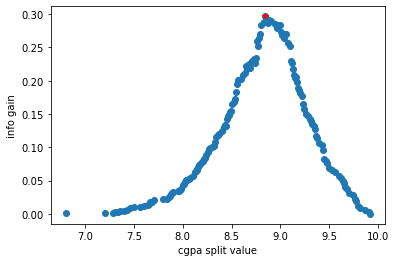

In [268]:
plt.plot(ig_table['split_value'], ig_table['info_gain'],'o')
plt.plot(ig_table['split_value'].iloc[0], ig_table['info_gain'].iloc[0],'r*')
plt.xlabel('cgpa split value')
plt.ylabel('info gain')

After this process is repeated, and there is no further info gain by splitting,

the tree is finally built. Last to evaluate, any sample traverses through tree and 

appropriate splits until it reaches a leaf node, and then assigned the majority class
of that leaf (or weighted majority).

 